# name : Abdallah Moataz Kamal

# about data
involves only 2 variables

# target 
what will be predicted score if student studies for 9.25hrs/day 

# importing necessary libraries 

In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [109]:
#reading data 
df=pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [110]:
df.shape #shape of data 

(25, 2)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [112]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [113]:
df.isnull().sum()  #if there is a null value


Hours     0
Scores    0
dtype: int64

In [114]:
df.duplicated().sum() #no duplicate values 

0

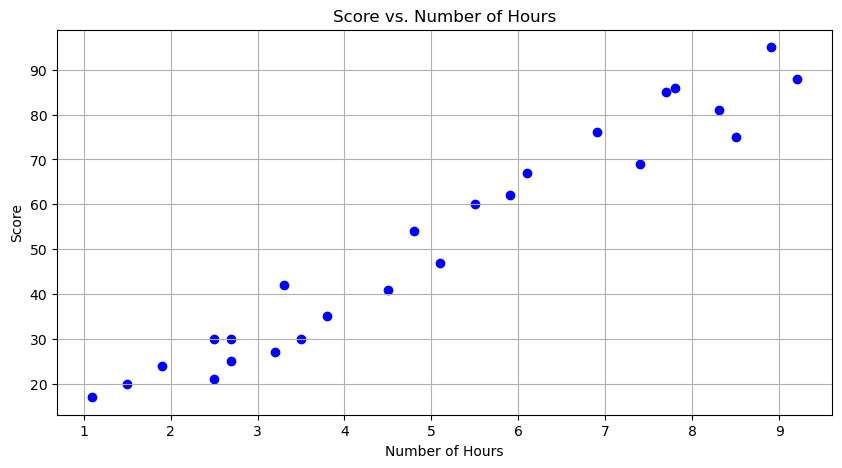

In [115]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Hours'], df['Scores'], color='blue')

plt.title('Score vs. Number of Hours')
plt.xlabel('Number of Hours')
plt.ylabel('Score')


plt.grid(True)
plt.show()

**there is a positive relationship between number of hours and score**

# modeling

In [116]:
x=df.drop('Scores',axis=1).values
y=df['Scores'].values

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
model=LinearRegression()

In [120]:
model.fit(x_train,y_train)

LinearRegression()

In [121]:
model.score(x_train,y_train)

0.9515510725211552

In [122]:
model.score(x_test,y_test)

0.9454906892105356

# prediction

In [123]:
y_pred=model.predict(x_test)

In [124]:
pred=pd.DataFrame({'actual':y_test,'predictied': y_pred})
pred

,actual,predictied
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**predicting the score when hrs is 9.25**

In [125]:
hours = np.array([[9.25]])  # Reshape to 2D array
predi = model.predict(hours)
print(f"No of Hours = {hours[0][0]}")
print(f"Predicted Score = {predi[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538


# evaluating 

In [126]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)

In [127]:
mae

4.183859899002975

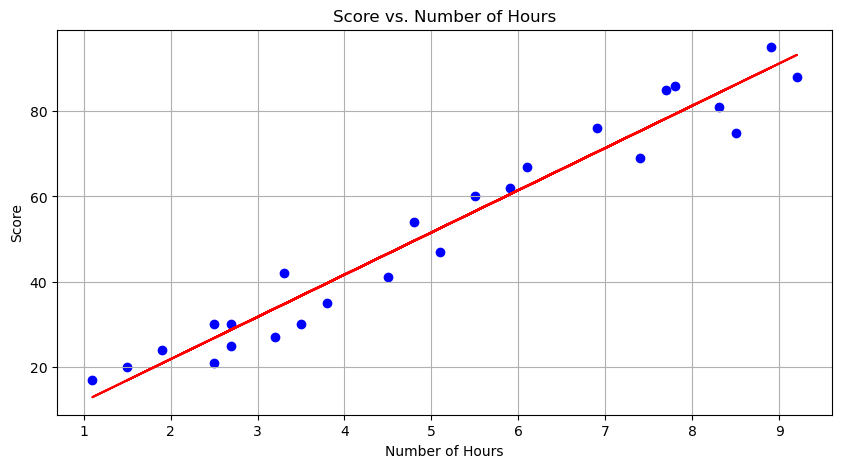

In [128]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue') # represent the actual data
plt.plot(x, model.predict(x), color='red') # The red line represents the linear regression model's predictions.

plt.title('Score vs. Number of Hours')
plt.xlabel('Number of Hours')
plt.ylabel('Score')
plt.grid(True)
plt.show()